In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC, LinearSVC

In [86]:
train_df = pd.read_csv(r'F:\Datasets\titanic\train.csv')
test_file = r'F:\Datasets\titanic\test.csv'
test_df = pd.read_csv(test_file)

In [87]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [89]:
train_df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [90]:
train_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [91]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [92]:
train_df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [93]:
train_df[train_df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [94]:
train_df['Embarked'].fillna(value = 'C', inplace = True)

In [95]:
train_df['Sex'].replace({'male':0,'female':1}, inplace=True)
train_df['Embarked'].replace({'S':0,'C':1,'Q':2}, inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


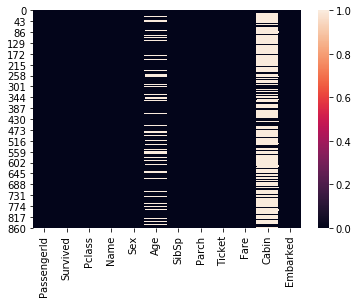

In [96]:
#vizualising for null values
sns.heatmap(train_df.isnull())

In [97]:
train_df['Age'].fillna((train_df['Age'].mean()), inplace = True)

In [98]:
train_df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

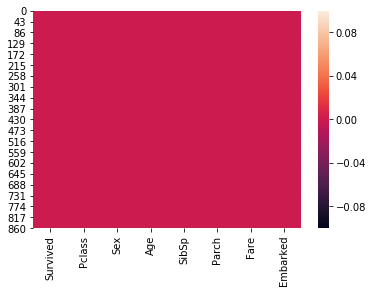

In [99]:
#checking for missing values on train data
sns.heatmap(train_df.isnull())

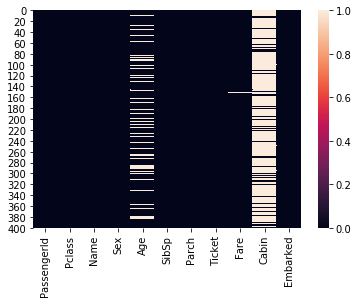

In [100]:
#checking for null values in testdata
sns.heatmap(test_df.isnull())


In [101]:
test_df.fillna(test_df['Age'].mean(), inplace = True)

In [103]:
test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace=True)

In [104]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [105]:
test_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [106]:
test_df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [107]:
test_df['Sex'].replace({'male':0, 'female':1}, inplace= True)
test_df['Embarked'].replace({'Q':0,'S':1,'C':2}, inplace =True)

In [108]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null int64
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


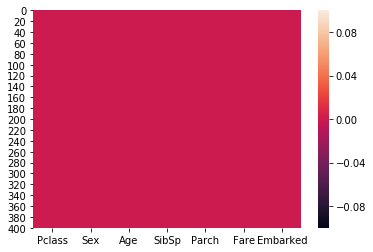

In [109]:
#checking for missing values in testdata
sns.heatmap(test_df.isnull())

In [110]:
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.363636
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.636159
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [111]:
test_df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.363636,30.272590,0.447368,0.392344,35.614378,1.133971
std,0.841838,0.481622,12.634534,0.896760,0.981429,55.841115,0.580452
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,3.000000,0.000000,30.272590,0.000000,0.000000,14.454200,1.000000
75%,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875,1.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [112]:
x_train = train_df.drop(['Survived'], axis = 1)
y_train = train_df['Survived']
x_test = test_df

In [113]:
x_train.shape, y_train.shape, x_test.shape

((891, 7), (891,), (418, 7))

In [118]:
#using svm classifier
svm = SVC()
svm.fit(x_train, y_train)
predict = svm.predict(x_test)
accuracy = round(svm.score(x_train, y_train)*100,2)
accuracy

E:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


89.23